In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

client_df=pd.read_csv('../data/client_data.csv')
price_df=pd.read_csv('../data/price_data.csv')

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### `client_data.csv`

- **id**: client company identifier
- **activity_new**: category of the company’s activity
- **channel_sales**: code of the sales channel
- **cons_12m**: electricity consumption of the past 12 months
- **cons_gas_12m**: gas consumption of the past 12 months
- **cons_last_month**: electricity consumption of the last month
- **date_activ**: date of activation of the contract
- **date_end**: registered date of the end of the contract
- **date_modif_prod**: date of the last modification of the product
- **date_renewal**: date of the next contract renewal
- **forecast_cons_12m**: forecasted electricity consumption for next 12 months
- **forecast_cons_year**: forecasted electricity consumption for the next calendar year
- **forecast_discount_energy**: forecasted value of current discount
- **forecast_meter_rent_12m**: forecasted bill of meter rental for the next 2 months
- **forecast_price_energy_off_peak**: forecasted energy price for 1st period (off peak)
- **forecast_price_energy_peak**: forecasted energy price for 2nd period (peak)
- **forecast_price_pow_off_peak**: forecasted power price for 1st period (off peak)
- **has_gas**: indicated if client is also a gas client
- **imp_cons**: current paid consumption
- **margin_gross_pow_ele**: gross margin on power subscription
- **margin_net_pow_ele**: net margin on power subscription
- **nb_prod_act**: number of active products and services
- **net_margin**: total net margin
- **num_years_antig**: antiquity of the client (in number of years)
- **origin_up**: code of the electricity campaign the customer first subscribed to
- **pow_max**: subscribed power
- **churn**: has the client churned over the next 3 months

### `price_data.csv`

- **id**: client company identifier
- **price_date**: reference date
- **price_off_peak_var**: price of energy for the 1st period (off peak)
- **price_peak_var**: price of energy for the 2nd period (peak)
- **price_mid_peak_var**: price of energy for the 3rd period (mid peak)
- **price_off_peak_fix**: price of power for the 1st period (off peak)
- **price_peak_fix**: price of power for the 2nd period (peak)
- **price

_mid_peak_fix**: price of power for the 3rd period (mid peak)

**Note**: Some fields are hashed text strings. This preserves the privacy of the original data, but the commercial meaning is retained, and they may have predictive power.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
client_df.channel_sales.unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

As mentioned in description of data, some informations are hashed text strings, however for visuals and other analysis methods this is not a good way to represent information. While we may lack the real-world meaning of this sales channels and similar other values, we can give simpler names, such as "channel_1" etc. for non missing values.

In [8]:
client_df.has_gas.unique()

array(['t', 'f'], dtype=object)

Can be converted to 1 and 0

In [9]:
client_df.origin_up.unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

Can be converted into suitable readable classes

In [10]:
client_df.date_activ.head(2)

0    2013-06-15
1    2009-08-21
Name: date_activ, dtype: object

Date information is stored as objects, this can be converted into datetime data type.

## Data Cleaning

1. Target and handle "MISSING" value.
2. Convert 't' and 'f' valeus to 1 and 0.
3. Convert hashed text information such as "lxidpiddsbxsbosboudacockeimpuepw" to more readable and visualized names.
4. Convert dates that are stored as objects to datetime, which will be helpful in visualization if time axed visualize will made.


In [11]:
# Handling missing objects in "Origin_up"
# Used method for imputing will be Random Forest imputer

#First lets turn all 'MISSING' values into null values
client_df.replace('MISSING', pd.NA, inplace=True)

#And check again for null values in general:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   10881 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

 So only two features, "channel_sales" and "origin_up" contains null values

In [12]:
# Creating function two impute this two category
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def random_forest_imputer(df, column_name):
    # Select only numerical columns (excluding the target column)
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if column_name in numerical_cols:
        numerical_cols.remove(column_name)

    # Splitting the data into two parts: one where target column is missing and one where it's not
    df_with_target = df[df[column_name].notna()]
    df_without_target = df[df[column_name].isna()]

    # Prepare your features (X) and target (y) using only numerical columns
    X = df_with_target[numerical_cols]
    y = df_with_target[column_name]

    # Splitting the data for training and validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predicting the missing values
    predicted_values = model.predict(df_without_target[numerical_cols])

    # Fill in the missing values in the original DataFrame
    df.loc[df[column_name].isna(), column_name] = predicted_values
    return df
    
#Before doing imputation lets create a backup of both dataset
backup_client_df=client_df.copy()
backup_price_df=price_df.copy()

client_df=random_forest_imputer(client_df,"origin_up")
client_df=random_forest_imputer(client_df,"channel_sales")


In [13]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [14]:
#Lets check if price has any missing values before moving on.
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

We have imputed missing files with logical selection using random forest classifier.

Now let's adress problem of hashed text and give them better categorical name.

In [15]:
def replace_hashed_strings(df, column_name,string):
    unique_values = df[column_name].unique()
    replacement_dict = {val: f'{string}_{i+1}' for i, val in enumerate(unique_values)}

    df[column_name] = df[column_name].map(replacement_dict)
    return df

client_df=replace_hashed_strings(client_df,"origin_up","origin")
client_df=replace_hashed_strings(client_df,"channel_sales","channel")


In [16]:
client_df.channel_sales.unique()

array(['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5',
       'channel_6', 'channel_7'], dtype=object)

Looks good!

In [17]:
# Replacing string "t" and "f" with 1 and 0
replace_dict={
	'f':0,
	't':1
}
client_df.has_gas.replace(replace_dict,inplace=True)

Finally we must change the date values that are stored as object to datetime:
- date_activ         
- date_end     
- date_modif_prod 
- date_renewal

In [18]:
client_df.date_activ.head()

0    2013-06-15
1    2009-08-21
2    2010-04-16
3    2010-03-30
4    2010-01-13
Name: date_activ, dtype: object

In [19]:
def convert_to_datetime(df, column_names):
    for column in column_names:
        df[column] = pd.to_datetime(df[column], errors='coerce')
    return df


column_names = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
client_df = convert_to_datetime(client_df, column_names)
price_df["price_date"] = pd.to_datetime(price_df["price_date"] , errors='coerce')

In [20]:
client_df.date_activ.head()

0   2013-06-15
1   2009-08-21
2   2010-04-16
3   2010-03-30
4   2010-01-13
Name: date_activ, dtype: datetime64[ns]

This concludes the data cleaning part.

## Exploratory Data Analysis

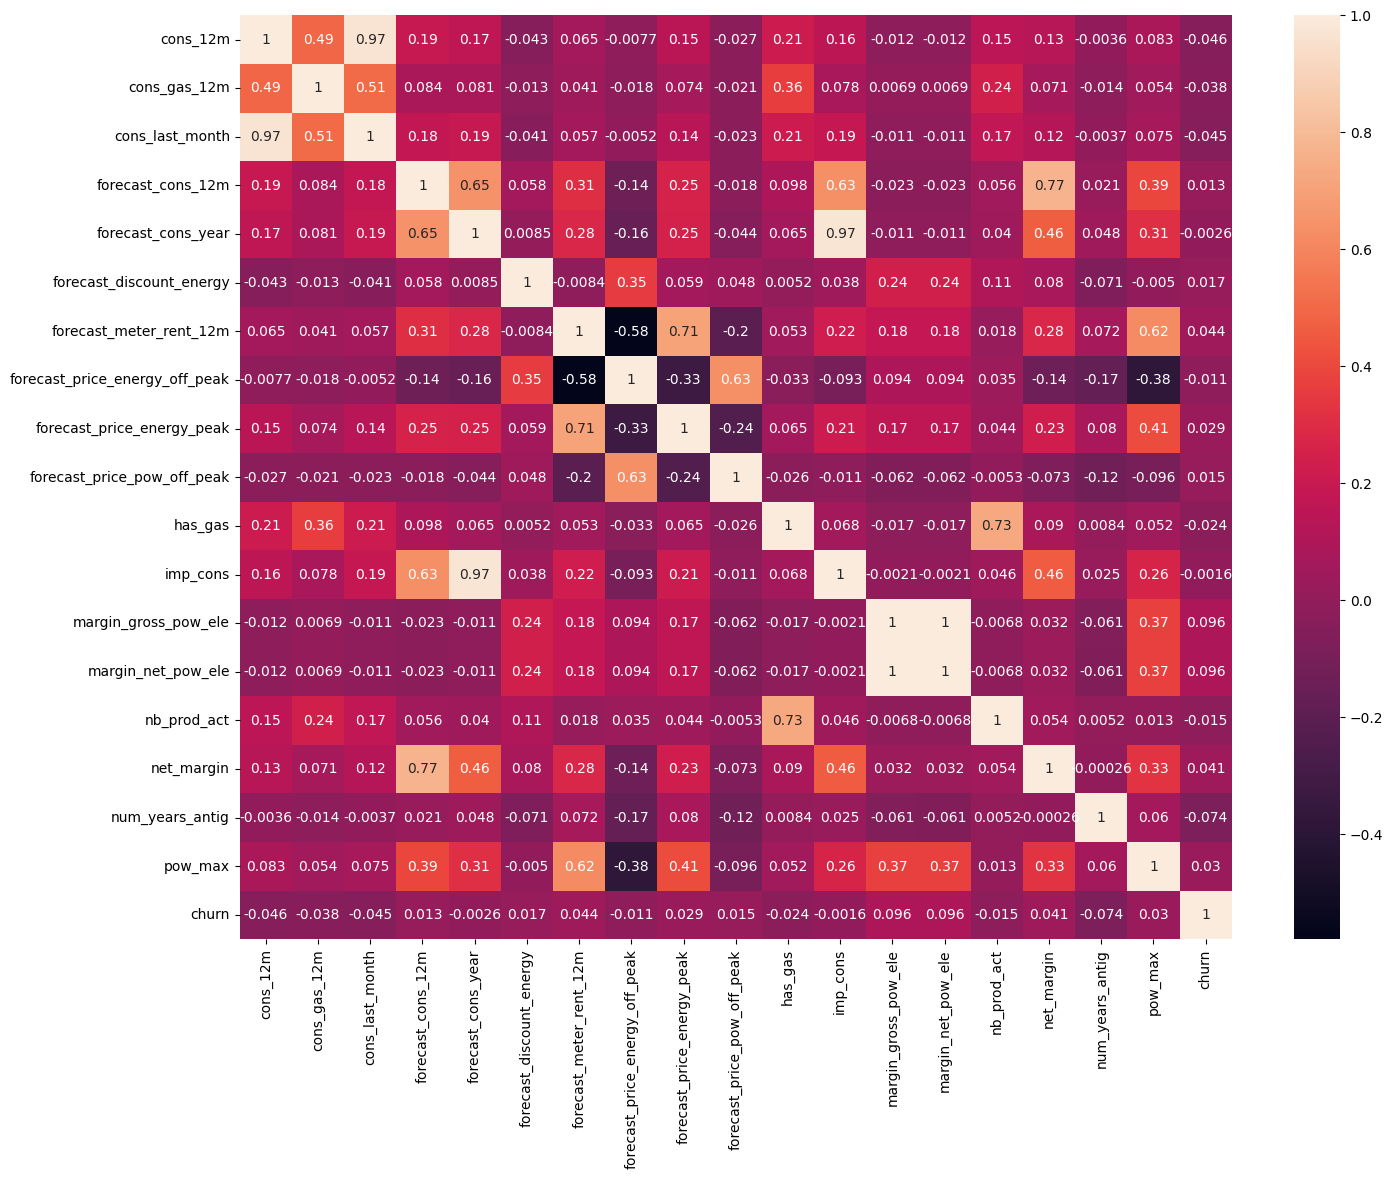

In [21]:
# Lets make a quick run on correlation heatmap to check churn correlation

numerical_cols = client_df.select_dtypes(include=['int64', 'float64'])
corrMatrix = numerical_cols.corr() 
plt.figure(figsize=(16,12))
sns.heatmap(corrMatrix, annot=True) 
plt.show()

There is no feature that directly affects the churn in numerical features. However two features "margin_gross_pow_ele" and "margin_net_pow_ele" have correlation coefficient of 1, which can confuse the model. Directly dropping features do not always result in increased accuracy but during model test, if accuracy found to be low, this two features can be adressed.

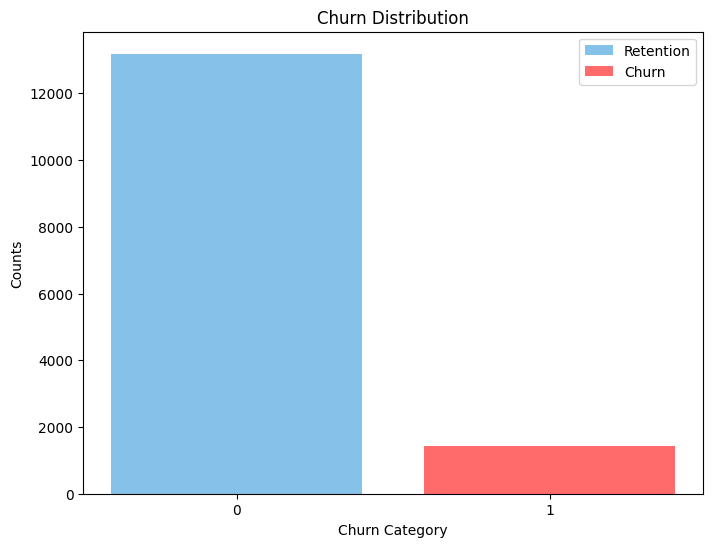

In [22]:
plt.figure(figsize=(8, 6))

# Count the occurrences of each unique value in the 'churn' column
churn_counts = client_df['churn'].value_counts()

# Define colors for each bar
colors = ['#85C1E9', '#FF6B6B']  # 'blue' for Retention (0), 'red' for Churn (1)

# Create a bar plot with different colors
for i, index in enumerate(churn_counts.index):
    plt.bar(index, churn_counts[index], color=colors[i])

# Create a legend
plt.legend(["Retention", "Churn"])

# Adding labels
plt.xlabel('Churn Category')
plt.xticks([0, 1])
plt.ylabel('Counts')
plt.title('Churn Distribution')

# Display the plot
plt.show()

In [23]:
# Finding ratio of churn
print(f'Churn false count: {client_df.churn.value_counts()[0]}')
print(f'Churn true count: {client_df.churn.value_counts()[1]}')
print(f'Churn ratio: {client_df.churn.value_counts()[1]/client_df.churn.value_counts().sum():.3f}')

Churn false count: 13187
Churn true count: 1419
Churn ratio: 0.097


### Simple categorical visuals

We will use categorical features to see if there is any connection between churn. One example being channel sales, we can see if some of the sales channels have high probability of customer churn.

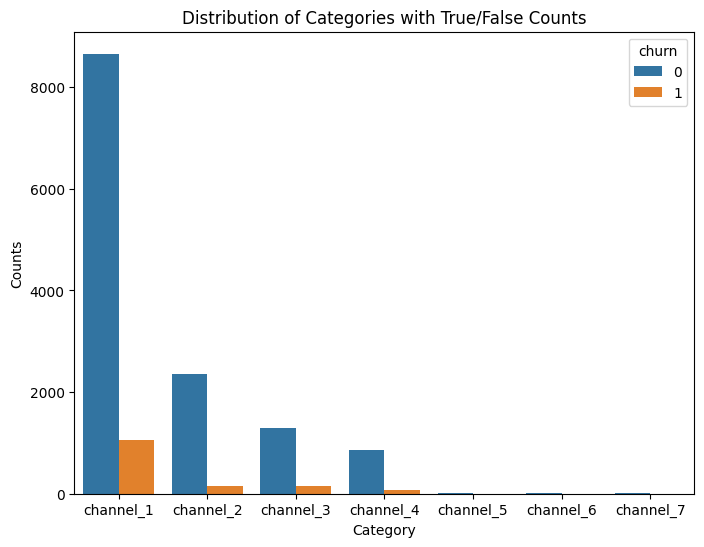

In [24]:

category_feature = 'channel_sales' 
binary_feature = 'churn' 

# Create a count plot
plt.figure(figsize=(8,6))
sns.countplot(x=category_feature, hue=binary_feature, data=client_df)

plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Distribution of Categories with True/False Counts')
plt.show()


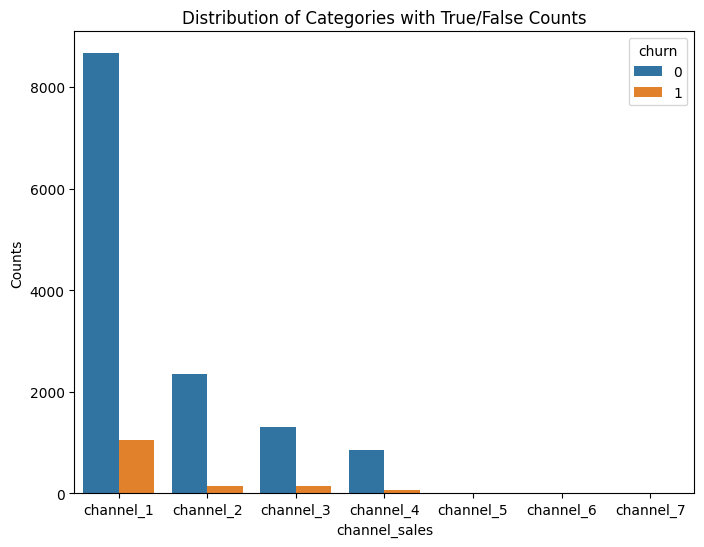

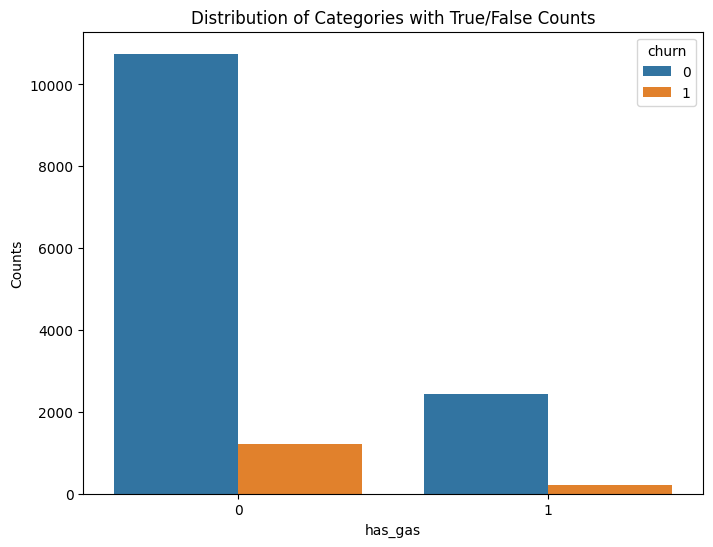

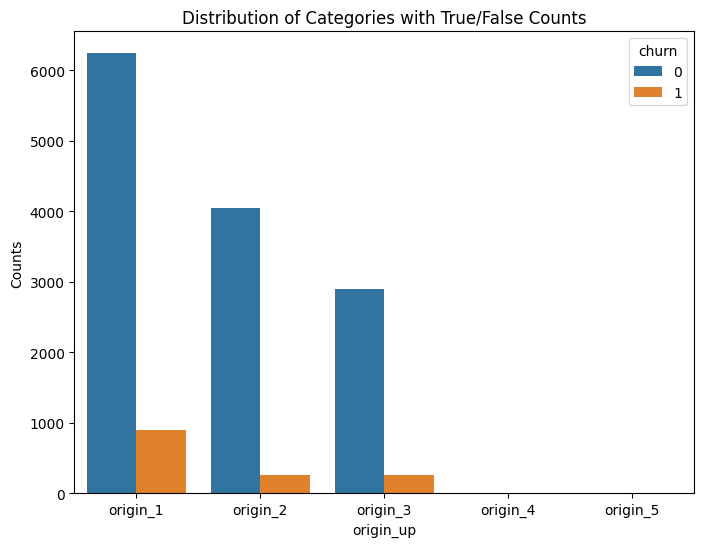

In [25]:

category_feature = ['channel_sales','has_gas','origin_up']
binary_feature = 'churn' 

# Create a count plot
for category in category_feature:
    plt.figure(figsize=(8,6))
    sns.countplot(x=category, hue=binary_feature, data=client_df)

    plt.xlabel(category)
    plt.ylabel('Counts')
    plt.title('Distribution of Categories with True/False Counts')
    plt.show()


A noticeable point is "origin_up", which is code of the electricity campaign the customer first subscribed to, seems to be higher in churn ratio with origin_1 but also the majority of the customers are also from origin_1 so this might not be suitable directly make assumptions.

In [26]:
# 18/01, note: try dates

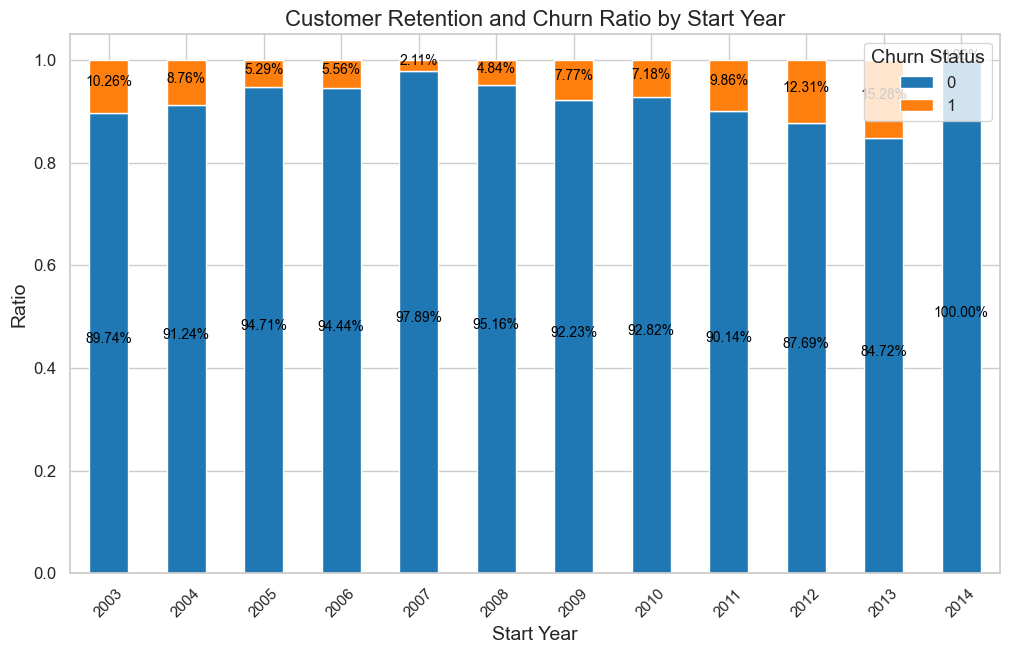

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Convert 'start_date' to datetime and extract the year
client_df['date_activ_year'] = pd.to_datetime(client_df['date_activ']).dt.year

# Group by start year and churn, and count the occurrences
yearly_data = client_df.groupby(['date_activ_year', 'churn']).size().unstack(fill_value=0)

# Calculate ratios for retention (0) and churn (1) for each year
yearly_data_ratio = yearly_data.div(yearly_data.sum(axis=1), axis=0)

# Plot stacked bar chart
ax = yearly_data_ratio.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#1f77b4', '#ff7f0e'])

# Annotate each bar with the percentage
for n, x in enumerate([*yearly_data_ratio.index.values]):
    for (proportion, y_loc) in zip(yearly_data_ratio.loc[x],
                                   yearly_data_ratio.loc[x].cumsum()):
        ax.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.2%}', color='black', fontsize=10, ha='center')

# Adding labels and title
plt.xlabel('Start Year', fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.title('Customer Retention and Churn Ratio by Start Year', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Adjust legend
plt.legend(title='Churn Status', fontsize=12, title_fontsize=14)

# Show plot
plt.show()


In [28]:
 client_df.groupby(['date_activ_year', 'churn']).size().unstack(fill_value=0)

churn,0,1
date_activ_year,,
2003,35,4
2004,125,12
2005,179,10
2006,34,2
2007,93,2
2008,118,6
2009,2481,209
2010,3350,259
2011,2486,272


From the graph and the table above we can see that other than 2014 where we have a customer who started to take service from us, we see a interesting trend. In general the oldest customers and newest customers tend to churn more. Especially new customers have higher chance for churn, customers with 6-8 year relation tend to continue service. New programs that make customers rely on the service for several years may give better chance in keeping the customers on the service.

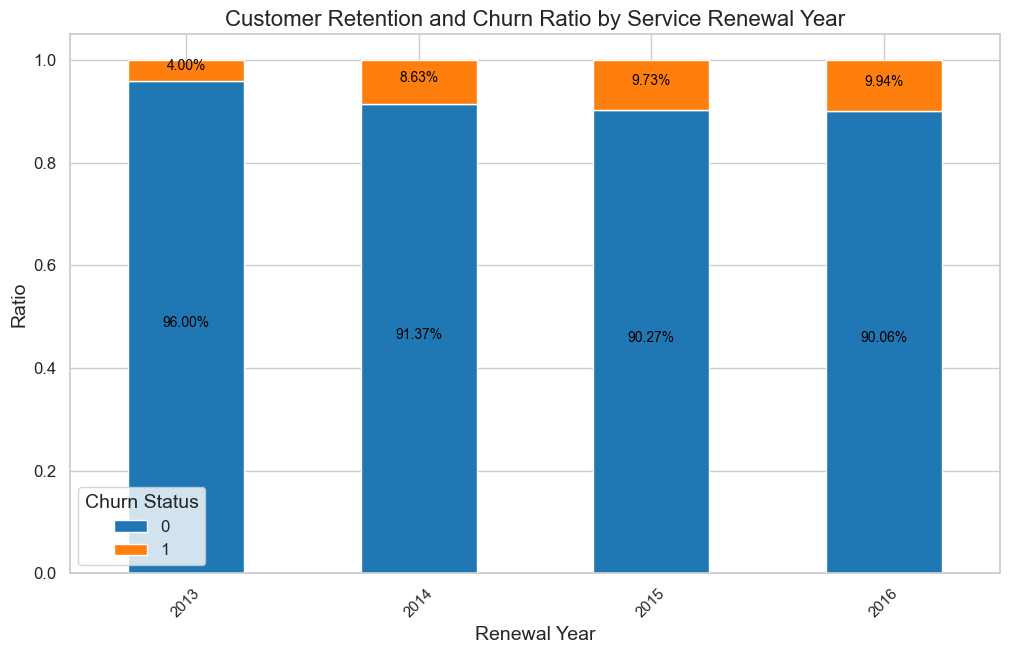

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Convert 'start_date' to datetime and extract the year
client_df['date_renewal_year'] = pd.to_datetime(client_df['date_renewal']).dt.year

# Group by start year and churn, and count the occurrences
yearly_data = client_df.groupby(['date_renewal_year', 'churn']).size().unstack(fill_value=0)

# Calculate ratios for retention (0) and churn (1) for each year
yearly_data_ratio = yearly_data.div(yearly_data.sum(axis=1), axis=0)

# Plot stacked bar chart
ax = yearly_data_ratio.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#1f77b4', '#ff7f0e'])

# Annotate each bar with the percentage
for n, x in enumerate([*yearly_data_ratio.index.values]):
    for (proportion, y_loc) in zip(yearly_data_ratio.loc[x],
                                   yearly_data_ratio.loc[x].cumsum()):
        ax.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.2%}', color='black', fontsize=10, ha='center')

# Adding labels and title
plt.xlabel('Renewal Year', fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.title('Customer Retention and Churn Ratio by Service Renewal Year', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Adjust legend
plt.legend(title='Churn Status', fontsize=12, title_fontsize=14)

# Show plot
plt.show()

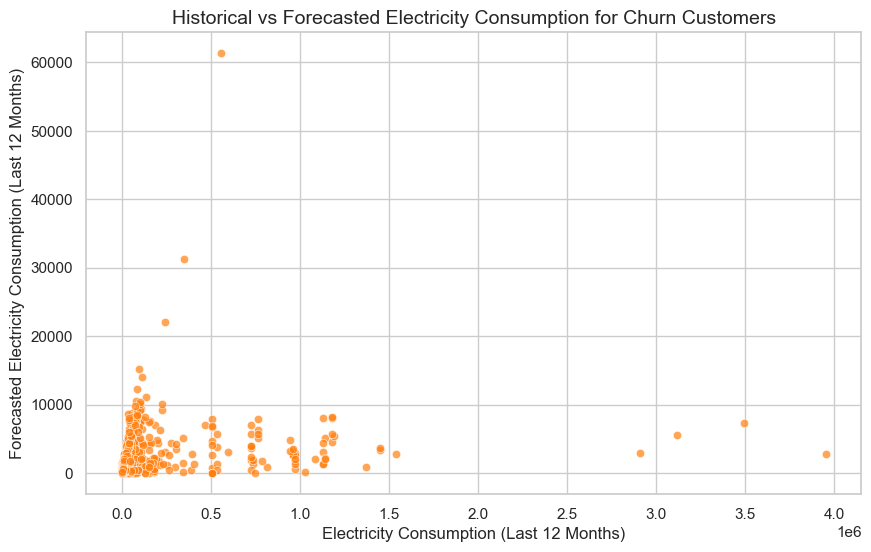

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cons_12m', y='forecast_cons_12m', data=client_df[client_df.churn==1], color=['#ff7f0e'], alpha=0.7)

# Adding labels and title
plt.xlabel('Electricity Consumption (Last 12 Months)', fontsize=12)
plt.ylabel('Forecasted Electricity Consumption (Last 12 Months)', fontsize=12)
plt.title('Historical vs Forecasted Electricity Consumption for Churn Customers', fontsize=14)


# Show plot
plt.show()


In general we have idea on how distribution of churn customers in respect to year, consumption and service. Next step is create a model that can accurately predict churn behaviour.

Lets check connection between client information and price data before moving on:

In [31]:
# Merge the dataframes on client_id
merged_df = pd.merge(client_df, price_df, left_on='id', right_on='id')


In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  object        
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

In [33]:
merged_df.describe().T

,count,mean,min,25%,50%,75%,max,std
cons_12m,175149.0,159260.578525,0.0,5674.0,14115.0,40763.0,6207104.0,573541.331047
cons_gas_12m,175149.0,28080.717829,0.0,0.0,0.0,0.0,4154590.0,162940.034053
cons_last_month,175149.0,16095.518404,0.0,0.0,792.0,3383.0,771203.0,64376.741908
date_activ,175149,2011-01-28 04:01:02.401726720,2003-05-09 00:00:00,2010-01-15 00:00:00,2011-03-04 00:00:00,2012-04-19 00:00:00,2014-09-01 00:00:00,NaN
date_end,175149,2016-07-27 20:42:41.923847680,2016-01-28 00:00:00,2016-04-27 00:00:00,2016-08-01 00:00:00,2016-10-31 00:00:00,2017-06-13 00:00:00,NaN
date_modif_prod,175149,2013-01-02 04:53:06.434407168,2003-05-09 00:00:00,2010-08-12 00:00:00,2013-06-17 00:00:00,2015-06-16 00:00:00,2016-01-29 00:00:00,NaN
date_renewal,175149,2015-07-21 09:21:44.825034752,2013-06-26 00:00:00,2015-04-17 00:00:00,2015-07-27 00:00:00,2015-10-29 00:00:00,2016-01-28 00:00:00,NaN
forecast_cons_12m,175149.0,1868.343884,0.0,494.98,1112.61,2400.35,82902.83,2387.560169
forecast_cons_year,175149.0,1399.78238,0.0,0.0,314.0,1745.0,175375.0,3248.331276
forecast_discount_energy,175149.0,0.967028,0.0,0.0,0.0,0.0,30.0,5.109025


C:\Users\metin\AppData\Local\Temp\ipykernel_31048\910095753.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn_x', y='price_off_peak_var', data=avg_prices, palette=palette)


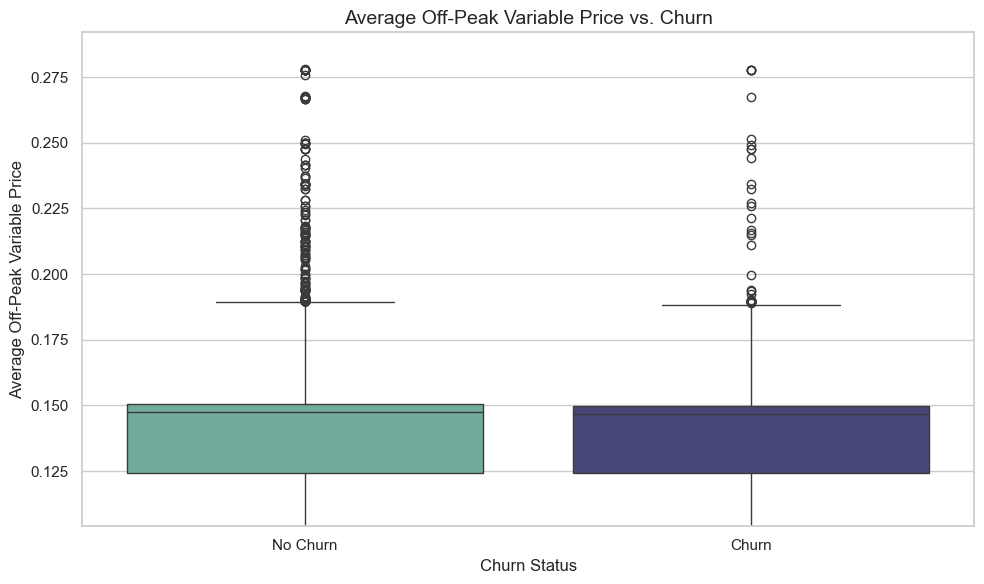

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns you want to calculate the mean for
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()


# Group by 'id' and calculate mean only for the numeric columns
avg_prices = merged_df.groupby('id')[numeric_cols].mean()

# Add churn information back to the average price data
avg_prices = avg_prices.merge(client_df[['id', 'churn']], on='id')

# Define a color palette for the churn categories for better distinction
palette = {'0.0': "#69b3a2", '1.0': "#404080"}  # Replace with colors of your choice

# Plot for one of the price components, e.g., 'price_off_peak_var'
sns.boxplot(x='churn_x', y='price_off_peak_var', data=avg_prices, palette=palette)

# Enhance the plot with clearer labels and title
plt.title('Average Off-Peak Variable Price vs. Churn', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Average Off-Peak Variable Price', fontsize=12)

# Clarify the x-axis tick labels for better understanding
plt.xticks([0, 1], ['No Churn', 'Churn'])

# Optionally, set the y-axis to start at a higher value if there are many outliers close to zero
plt.ylim(bottom=avg_prices['price_off_peak_var'].quantile(0.01))  # Adjust the quantile as needed

# Improve the overall readability with a larger figure size
plt.gcf().set_size_inches(10, 6)

# Show plot with a tight layout
plt.tight_layout()
plt.show()


In [35]:
avg_prices

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,num_years_antig,pow_max,churn_x,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn_y
0,0002203ffbb812588b632b9e628cc38d,22034.0,0.0,3084.0,729.06,425.0,0.0,138.95,0.116900,0.100015,...,6.0,17.250,0.0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0
1,0004351ebdd665e6ee664792efc4fd13,4060.0,0.0,0.0,597.77,0.0,0.0,6.84,0.142065,0.000000,...,6.0,13.200,0.0,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,7440.0,0.0,1062.0,1311.16,1062.0,30.0,18.37,0.199230,0.000000,...,3.0,13.856,0.0,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,11272.0,0.0,0.0,1671.41,0.0,0.0,18.27,0.144149,0.000000,...,6.0,13.200,0.0,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,267414.0,0.0,19394.0,3077.34,1760.0,0.0,144.86,0.118636,0.101750,...,3.0,20.000,0.0,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,117182.0,0.0,12674.0,7235.32,6340.0,0.0,140.94,0.112922,0.097810,...,11.0,34.640,0.0,0.122426,0.102375,0.072210,40.606699,24.364017,16.242678,0
14602,fffac626da707b1b5ab11e8431a4d0a2,131409.0,0.0,4405.0,2310.41,0.0,0.0,18.32,0.143166,0.000000,...,5.0,15.000,0.0,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,0
14603,fffc0cacd305dd51f316424bbb08d1bd,40274.0,2055098.0,6247.0,3430.56,4980.0,24.0,144.06,0.148299,0.125137,...,3.0,16.500,0.0,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,0
14604,fffe4f5646aa39c7f97f95ae2679ce64,32066.0,2916.0,4879.0,3313.13,4879.0,0.0,130.31,0.115174,0.098837,...,4.0,31.500,0.0,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,0


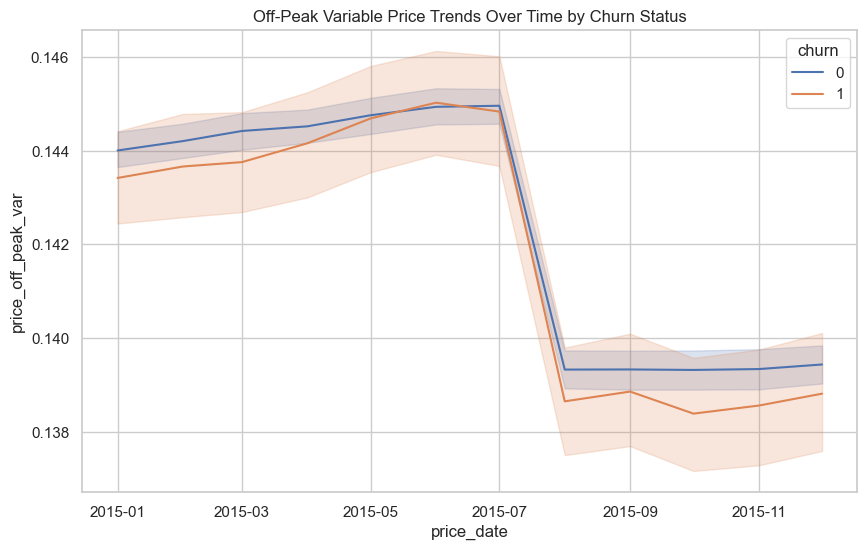

In [36]:
# Plotting price trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='price_date', y='price_off_peak_var', hue='churn', data=merged_df)
plt.title('Off-Peak Variable Price Trends Over Time by Churn Status')
plt.show()


This is definitely interesting graph. We can see overall, churn customers actually had lower average peak price. This might indicate while price is important, might be not the leading factor for deciding. However if we look at min and max areas of price for churn, we can also see that max price value for churn customers mostly exceeds customer who are still continuing on the service.

In [37]:
merged_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,churn,date_activ_year,date_renewal_year,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,channel_1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,2013,2015,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,channel_1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,2013,2015,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,channel_1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,2013,2015,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,channel_1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,2013,2015,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,channel_1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,2013,2015,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,channel_1,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0,2009,2015,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,channel_1,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0,2009,2015,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,channel_1,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0,2009,2015,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,channel_1,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,0,2009,2015,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


In [39]:
# Dropping last two columns we have created during visualization
client_df.drop(client_df.columns[-2:], axis=1, inplace=True)

In [41]:
client_df.to_csv('../data/cleaned_client_data.csv')